## Part 1. Using Naïve Bayes to work with Text Data   (30 points)

### 1. Representing text as data [10 pts]

In [1]:
#(1) Learn the 'vocabulary' of the training data: convert text into a matrix of token counts 
# by using CountVectorizer(). [2 points]

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
simple_train

['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [3]:
vect = CountVectorizer()
vect.fit(simple_train)
vect.get_feature_names()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['cab', 'call', 'me', 'please', 'tonight', 'you']

In [4]:
#(2) Transform training data into a 'document-term matrix' (which is a sparse matrix). 
# Print the sparse matrix. [1 points]

In [5]:
documentTermMatrix = vect.transform(simple_train)
print (documentTermMatrix)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [6]:
#(3) Convert the sparse matrix to a dense matrix (Hints: you can use “toarray()”) [1 points]

In [7]:
documentTermMatrix.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [8]:
#(4) Examine the vocabulary and document-term matrix together 
# (Hints: use pandas DataFrame and columns by using “get_feature_names()) [2 points]

In [9]:
pd.DataFrame(documentTermMatrix.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [10]:
#(5) Transform testing data into a document-term matrix (using existing vocabulary) [2 points]

In [11]:
simple_test = ["please don't call me"]
documentTermMatrix_testData = vect.transform(simple_test)
documentTermMatrix_testData.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [12]:
#(6) Examine the vocabulary and document-term matrix together again. [2 points]

In [13]:
pd.DataFrame(documentTermMatrix_testData.toarray(), columns=vect.get_feature_names())

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


### 2. Analyzing SMS data with Naïve Bayes [20 pts]

In [14]:
#(1) Read into the data from the file “sms.tsv” sms-1.tsv Download sms-1.tsv ; 
#give the names of columns as ['label', 'message']; 
#and print the first 10 samples to view part of the data. [2 points]

In [15]:
localFilePath ="/Users/sudharsan/Downloads/sms-1.tsv" #Use the local system filepath
df1=pd.read_csv(localFilePath, sep='\t', names=['label', 'message'])
df1.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
#(2) Convert label to a numeric variable. [2 points]

In [17]:
df1['label'] = df1.label.map({'ham':0, 'spam':1})
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
#(3) Then define the X and y [2 points]

In [19]:
X = df1.message
y = df1.label
print(X)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64


In [20]:
#(4) Split into training and testing sets by train_test_split(); 
#and print the shape of training set and test set. [2 points]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [22]:
#(5) Vectorizing SMS data by using CountVectorizer() and transform training and 
#test sets into document-term matrices respectively. [4 points]

In [23]:
vect = CountVectorizer()

vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [24]:
#(6) Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the 
#following requirements, respectively: [8 points]

#a) calculate accuracy of predictions
#b) give the confusion matrix
#c) print message text for the false positives
#d) print message text for the false negatives

In [25]:
#MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

y_pred_class = nb.predict(X_test_dtm)


from sklearn import metrics
print("accuracy of class predictions",metrics.accuracy_score(y_test, y_pred_class))


print("confusion matrix",metrics.confusion_matrix(y_test, y_pred_class))



print(X_test[y_test < y_pred_class])

print(X_test[y_test > y_pred_class])



accuracy of class predictions 0.9885139985642498
confusion matrix [[1203    5]
 [  11  174]]
574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object
3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object


In [26]:
#GaussianNB
from sklearn.feature_selection import SelectPercentile
features_names = vectorizer.get_feature_names()
selector = SelectPercentile(percentile=5)
selector.fit(X_train_transformed, y_train)

X_train_transformed = selector.transform(X_train_transformed).toarray()

X_test_transformed = selector.transform(X_test_transformed).toarray()
nb = GaussianNB()
nb.fit(X_train_transformed, y_train)
y_pred_class = nb.predict(X_test_transformed)


from sklearn import metrics
print("accuracy of class predictions",metrics.accuracy_score(y_test, y_pred_class))


print("confusion matrix",metrics.confusion_matrix(y_test, y_pred_class))




print(X_test[y_test < y_pred_class])

print(X_test[y_test > y_pred_class])



accuracy of class predictions 0.9741564967695621
confusion matrix [[1186   22]
 [  14  171]]
3242      Ok i've sent u da latest version of da project.
3375                              Also andros ice etc etc
2820    Don't forget who owns you and who's private pr...
1564       Get ready to put on your excellent sub face :)
634     Got it. Seventeen pounds for seven hundred ml ...
5272    Hello.How u doing?What u been up 2?When will u...
2909    Why must we sit around and wait for summer day...
2652    Text me when you get off, don't call, my phone...
2903    Bill, as in: Are there any letters for me. i’m...
4634          Oh wow thats gay. Will firmware update help
3970    Thanks for your message. I really appreciate y...
3276    Hurry home u big butt. Hang up on your last ca...
2579    Erm. I thought the contract ran out the4th of ...
2162    Is she replying. Has boye changed his phone nu...
4009    Forgot you were working today! Wanna chat, but...
1457    U sleeping now.. Or you going

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Part 2: Analyzing Boston housing

In [27]:
# 1. Read into the data and process it in the right format for using machine learning

In [28]:
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.columns=['0','1','2','3','4','5','6','7','8','9','10','11','12']
df

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
# 2. Then, use the DataFrame corr() method to show what features are correlated with each other.

In [30]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [31]:
# 3. The columns don't have any labels. Given the name of columns as 
#['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 
#'lstat']; then use the DataFrame corr() again.

In [32]:
df.columns= ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [33]:
# 4. Now, you have the numbers from the correlation matrix, but it's not as easy to view or 
#interpret as a plot. Please write codes to plot correlations by color same as (similar with) 
#the following figure

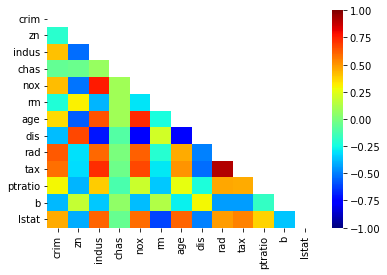

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
matrix = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), cmap='jet',mask=matrix,vmin=-1.0, vmax=1.0)
plt.show()

In [35]:
# 5. In the above plot, what features are highly correlated? Which features are highly 
#uncorrelated?

Highly correlatred features : 'indus', 'nox', 'age', 'tax', 'rad'

Highly uncorrelated features : 'zn', 'dis'

In [36]:
# 6. Next, building the Linear Regression model
# First, please split the data into two datasets as training and test sets. 
#According to the four steps taught in the classes, please train the model by linear regression
#and predict.

In [37]:
df['medv'] = boston_dataset.target
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, test_size = 0.25, random_state=5)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
#Please print the coefficient for your model from the above results. 
#It requires you to print each element of the coefficient and the corresponding the feature 
#names. 

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, train_predict)))
r2 = r2_score(y_train, train_predict)
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
print(coef_table)

          0      Coefs
0      crim  -0.153005
1        zn   0.047939
2     indus  -0.008601
3      chas   2.579867
4       nox -14.632565
5        rm   3.962834
6       age  -0.007924
7       dis  -1.460780
8       rad   0.345431
9       tax  -0.012450
10  ptratio  -0.919093
11        b   0.013220
12    lstat  -0.517255


In [41]:
#Finally, to gain an understanding of how your model is performing, please score the model
#against 2 metrics: R squared and mean squared error. Write the lines of code to get your 
#output

In [42]:
rmse = (np.sqrt(mean_squared_error(y_train, train_predict)))
r2 = r2_score(y_train, train_predict)

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_predict)))
r2 = r2_score(y_test, test_predict)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
RMSE is 4.638337420049743
R2 score is 0.7468034208269783


The model performance for testing set
RMSE is 4.926926862831221
R2 score is 0.7059096071098045


In [43]:
#(a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?

Mean Squared Error measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
The RMSE score 4.63 and 4.92 is fair. The R2 score 74% and 70% is average.

In [44]:
#(b) What you think could improve the model?

Hyperparameter tuning could help improve the model's accuracy.

## Part 3: Face Recognition

In [45]:
from sklearn.datasets import fetch_lfw_people
import seaborn as sns
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
y = faces.target

In [46]:
#1. Visualizing the data first: Use subplots to plot some samples. 
#The deploys of subplots should be 3 rows and 5 columns

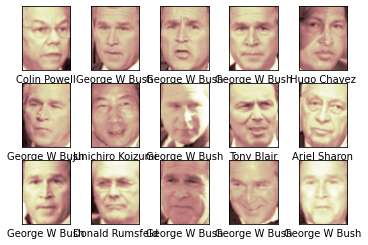

In [47]:
fig, ax = plt.subplots(3, 5)
for i, axes in enumerate(ax.flat):
    axes.imshow(faces.images[i], cmap = 'pink')
    axes.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [48]:
# 2. Dimensionality reduction: Since each image contains very high dimensions, use PCA approach 
#to reduce to150 components.

In [49]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [50]:
# 3. Processing data for training and testing.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
# 4. Since using SVM classifier with ‘rbf’ kernel, GridserachCV is used to tune the optimal 
#parameters: C [1, 5, 10, 50] and gamma [0.0001, 0.0005, 0.001, 0.005].

In [53]:
from sklearn.model_selection import GridSearchCV
parameter = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
GCV = GridSearchCV(model, parameter)

In [54]:
# 5. Use model attribute to print the best parameters C and gamma.

In [55]:
GCV.fit(X_train, y_train)
print(GCV.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [56]:
# 6. Use this best trained estimator (model) to predict the test set.

In [57]:
model = GCV.best_estimator_
pred = model.predict(X_test)

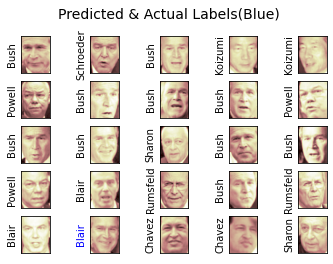

In [58]:
fig, ax = plt.subplots(5, 5)
for i, axes in enumerate(ax.flat):
    axes.imshow(X_test[i].reshape(62, 47), cmap='pink')
    axes.set(xticks=[], yticks=[])
    axes.set_ylabel(faces.target_names[pred[i]].split()[-1],
                   color='black' if pred[i] == y_test[i] else 'blue')
fig.suptitle('Predicted & Actual Labels(Blue)', size=14);

In [59]:
# 7. Print out the classification report.

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [61]:
# 8. Use the confusion matrix to plot ‘True labels’ and ‘Predicted labels’.

<AxesSubplot:>

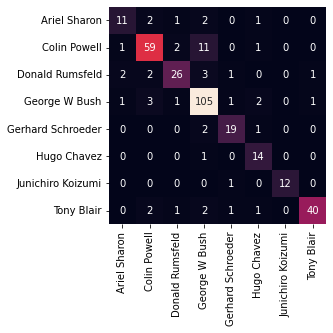

In [62]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)